# Token annotation overlaps

## Read mapping information

In [8]:
import os

import pandas as pd


demoTrainDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_train.csv', sep='\t')
demoTestDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_test.csv', sep='\t')
demoValidateDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_validate.csv', sep='\t')
demoDf = pd.concat([demoTrainDf, demoTestDf, demoValidateDf], ignore_index=True)
demoDf

,person_id,visit_occurrence_id,TYPE,COUNTRY_OF_BIRTH,SEX,Age_Bin,JOURNEY_ID
0,678487,3312694,Emergency,Australia,Male,"(60, 70]",3312694
1,2094045,9199249,Emergency,Australia,Male,"(20, 30]",9199249
2,2107813,9410987,Emergency,Australia,Male,"(50, 60]",9410987
3,2083212,602890,Inpatient,Australia,Female,"(40, 50]",9039437
4,2083212,9039437,Emergency,Australia,Female,"(40, 50]",9039437
...,...,...,...,...,...,...,...
7194,2603535,16588204,Inpatient,Australia,Male,"(60, 70]",16588204
7195,2603535,16709341,Inpatient,Australia,Male,"(60, 70]",16709341
7196,2603535,16651755,Inpatient,Australia,Male,"(60, 70]",16651755
7197,2098616,16872774,Emergency,Australia,Female,"(80, 90]",16872774


In [9]:
import os

mappingDf = pd.read_csv(os.environ['GENOMICS_DATA_BASE'] + '/patient_tube_id_mapping_full.tsv', sep='\t')
mappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


In [10]:
mappedJourneyTubeIdsDf = mappingDf[['tube_code', 'PATIENT_ID', 'EPISODE_ID']].drop_duplicates().merge(
    demoDf[['person_id', 'visit_occurrence_id', 'JOURNEY_ID']],
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(
    columns=['PATIENT_ID', 'EPISODE_ID', 'visit_occurrence_id']
)[['person_id', 'JOURNEY_ID', 'tube_code']].drop_duplicates()
mappedJourneyTubeIdsDf

,person_id,JOURNEY_ID,tube_code
0,50056,13224842,AH20B011
1,62567,12645629,AH19G065
2,138108,14737781,AH21E052
3,211314,13955099,AH20J009
4,211314,13955099,KPN2214
...,...,...,...
512,2084373,16158768,ALF22C004
513,1058066,16759482,ALF22H089
514,2552781,16966609,ALF22J054
515,2638484,16969999,ALF22K143


## Read tokens

In [20]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files')

bedDfList = []
for bedFile in os.listdir(bedDir):
    df = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    df['tube_code'] = [bedFile.split('_')[0]]*df.shape[0]
    bedDfList.append(df)

tokensDf = pd.concat(bedDfList, ignore_index=True)
tokensDf = tokensDf.merge(
    mappedJourneyTubeIdsDf,
    how='inner',
    on=['tube_code']
)
tokensDf

,contig_id,start_position,end_position,tokens,score,tube_code,person_id,JOURNEY_ID
0,1,0,6,ATAAAAG,-0.003121,AH19J022,339352,12918534
1,1,7,10,TGGA,0.000430,AH19J022,339352,12918534
2,1,11,13,CTC,-0.003118,AH19J022,339352,12918534
3,1,14,19,AAATGG,0.003535,AH19J022,339352,12918534
4,1,20,24,CACAC,-0.006215,AH19J022,339352,12918534
...,...,...,...,...,...,...,...,...
50325,23,90,94,AGTCA,-0.028988,AH19I043,2218413,12821548
50326,23,95,100,AGCGCT,-0.031133,AH19I043,2218413,12821548
50327,23,101,102,CG,-0.029464,AH19I043,2218413,12821548
50328,23,103,107,CATAC,0.031963,AH19I043,2218413,12821548


## Read annotations

In [25]:
import os
import pandas as pd


annotationsDfList = []

gffDir = os.environ['GENOMICS_DATA_BASE'] + '/annotations/s_aureus_gff3'

for fileName in os.listdir(gffDir):

    tubeCode = fileName.split('.')[0]

    gffDf = pd.read_csv(
        gffDir + '/' + fileName,
        sep='\t',
        comment='#',
        names=['sequence_id', 'source', 'feature_type', 'feature_start', 'feature_end', 'score', 'strand', 'phase', 'atributes']
    )
    gffDf['id'] = gffDf.atributes.apply(lambda x: [att.split('=')[1] for att in x.split(';') if att.split('=')[0] == 'ID']).apply(lambda x: None if (len(x) == 0) else x[0])
    gffDf['name'] = gffDf.atributes.apply(lambda x: [att.split('=')[1] for att in x.split(';') if att.split('=')[0] == 'Name']).apply(lambda x: None if (len(x) == 0) else x[0])
    gffDf['gene'] = gffDf.atributes.apply(lambda x: [att.split('=')[1] for att in x.split(';') if att.split('=')[0] == 'gene']).apply(lambda x: None if (len(x) == 0) else x[0])
    gffDf['tube_code'] = tubeCode
    annotationsDfList.append(gffDf)

annotationsDf = pd.concat(annotationsDfList, ignore_index=True)
annotationsDf = annotationsDf.merge(
    mappedJourneyTubeIdsDf,
    how='inner',
    on=['tube_code']
)
annotationsDf = annotationsDf[annotationsDf.feature_type != 'region']
annotationsDf

,sequence_id,source,feature_type,feature_start,feature_end,score,strand,phase,atributes,id,name,gene,tube_code,person_id,JOURNEY_ID
1,1,Prodigal,CDS,214,465,.,+,0,ID=CENNFK_00005;Name=Transposase;locus_tag=CEN...,CENNFK_00005,Transposase,None,AH21B039,908851,14408941
2,1,Prodigal,CDS,475,972,.,+,0,ID=CENNFK_00010;Name=Thioredoxin/glutathione p...,CENNFK_00010,Thioredoxin/glutathione peroxidase BtuE%2C red...,btuE,AH21B039,908851,14408941
3,1,Prodigal,CDS,1363,3243,.,+,0,ID=CENNFK_00015;Name=assimilatory sulfite redu...,CENNFK_00015,assimilatory sulfite reductase (NADPH) flavopr...,cysJ,AH21B039,908851,14408941
4,1,Prodigal,CDS,3309,3917,.,+,0,ID=CENNFK_00020;Name=NAD(P)-binding protein;lo...,CENNFK_00020,NAD(P)-binding protein,cysG2,AH21B039,908851,14408941
5,1,Prodigal,CDS,4406,5776,.,+,0,ID=CENNFK_00025;Name=Mg2+/citrate symporter;lo...,CENNFK_00025,Mg2+/citrate symporter,citM,AH21B039,908851,14408941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208574,30,tRNAscan-SE,tRNA,75,149,.,-,.,ID=CONGNE_13210;Name=tRNA-Asn(gtt);locus_tag=C...,CONGNE_13210,tRNA-Asn(gtt),trnN,AH21J041,2251684,15514899
208576,31,Prodigal,CDS,38,160,.,+,0,ID=CONGNE_13215;Name=EF-hand domain-containing...,CONGNE_13215,EF-hand domain-containing protein,None,AH21J041,2251684,15514899
208578,32,tRNAscan-SE,tRNA,17,93,.,+,.,ID=CONGNE_13220;Name=tRNA-Ile(gat);locus_tag=C...,CONGNE_13220,tRNA-Ile(gat),trnI,AH21J041,2251684,15514899
208579,32,tRNAscan-SE,tRNA,115,180,.,+,.,ID=CONGNE_13225;Name=tRNA-Ala(tgc);locus_tag=C...,CONGNE_13225,tRNA-Ala(tgc),trnA,AH21J041,2251684,15514899


## Obtain for overlaps

In [58]:
from tqdm import tqdm

overlapList = []
overlappingAnnotationsDfList = []

for i, row in tqdm(tokensDf.iterrows()):
    overlappingAnnotationsDf = annotationsDf[(annotationsDf.tube_code == row.tube_code) & (annotationsDf.sequence_id == row.contig_id) & (row.start_position >= annotationsDf.feature_start) & (row.end_position <= annotationsDf.feature_end)]
    overlappingAnnotationsDfList.append(overlappingAnnotationsDf)
    overlap = (overlappingAnnotationsDf.shape[0] > 0)
    overlapList.append(overlap)

50330it [08:34, 97.89it/s]


In [59]:
tokensDf['overlap'] = overlapList
tokensDf

,contig_id,start_position,end_position,tokens,score,tube_code,person_id,JOURNEY_ID,overlap
0,1,0,6,ATAAAAG,-0.003121,AH19J022,339352,12918534,False
1,1,7,10,TGGA,0.000430,AH19J022,339352,12918534,False
2,1,11,13,CTC,-0.003118,AH19J022,339352,12918534,False
3,1,14,19,AAATGG,0.003535,AH19J022,339352,12918534,False
4,1,20,24,CACAC,-0.006215,AH19J022,339352,12918534,False
...,...,...,...,...,...,...,...,...,...
50325,23,90,94,AGTCA,-0.028988,AH19I043,2218413,12821548,False
50326,23,95,100,AGCGCT,-0.031133,AH19I043,2218413,12821548,False
50327,23,101,102,CG,-0.029464,AH19I043,2218413,12821548,False
50328,23,103,107,CATAC,0.031963,AH19I043,2218413,12821548,False


In [61]:
import pandas as pd

overlappingAnnotationsDf = pd.concat(overlappingAnnotationsDfList, ignore_index=True)
overlappingAnnotationsDf = overlappingAnnotationsDf.drop_duplicates()
overlappingAnnotationsDf

,sequence_id,source,feature_type,feature_start,feature_end,score,strand,phase,atributes,id,name,gene,tube_code,person_id,JOURNEY_ID
0,1,Prodigal,CDS,465,1526,.,+,0,ID=PAKLKE_00005;Name=Membrane regulatory prote...,PAKLKE_00005,Membrane regulatory protein PfoR%2C PTS_EIIC_2...,pfoR,AH19J022,339352,12918534
9,2,Prodigal,CDS,155,2008,.,-,0,ID=PAKLKE_03540;Name=type VII secretion system...,PAKLKE_03540,type VII secretion system secreted protein%2C ...,esaD,AH19J022,339352,12918534
72,3,Prodigal,CDS,87,470,.,-,0,ID=PAKLKE_05820;Name=DUF1027 domain-containing...,PAKLKE_05820,DUF1027 domain-containing protein,yutD,AH19J022,339352,12918534
140,4,Prodigal,CDS,1,267,.,-,0,ID=PAKLKE_07330;Name=Cytosolic protein;locus_t...,PAKLKE_07330,Cytosolic protein,None,AH19J022,339352,12918534
188,4,Prodigal,CDS,365,799,.,+,0,ID=PAKLKE_07335;Name=Uncharacterized HEPN doma...,PAKLKE_07335,Uncharacterized HEPN domain protein YutE%2C UP...,yutE,AH19J022,339352,12918534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23244,14,Infernal,rRNA,1,113,2.5e-10,-,.,ID=CKDMFK_13345;Name=(3' truncated) 5S ribosom...,CKDMFK_13345,(3' truncated) 5S ribosomal RNA,rrf,AH19I043,2218413,12821548
23266,14,Infernal,rRNA,187,3042,1.5e-05,-,.,ID=CKDMFK_13350;Name=(5' truncated) 23S riboso...,CKDMFK_13350,(5' truncated) 23S ribosomal RNA,rrl,AH19I043,2218413,12821548
23331,15,Infernal,rRNA,37,1588,1.3e-49,-,.,ID=CKDMFK_13355;Name=16S ribosomal RNA;locus_t...,CKDMFK_13355,16S ribosomal RNA,rrs,AH19I043,2218413,12821548
23426,16,Prodigal,CDS,76,357,.,+,0,ID=CKDMFK_13360;Name=IS3 family transposase;lo...,CKDMFK_13360,IS3 family transposase,None,AH19I043,2218413,12821548


### Overlapping tokens with annotations

In [57]:
tokensDf.overlap.value_counts()

overlap
False    26865
True     23465
Name: count, dtype: int64

<Axes: xlabel='overlap'>

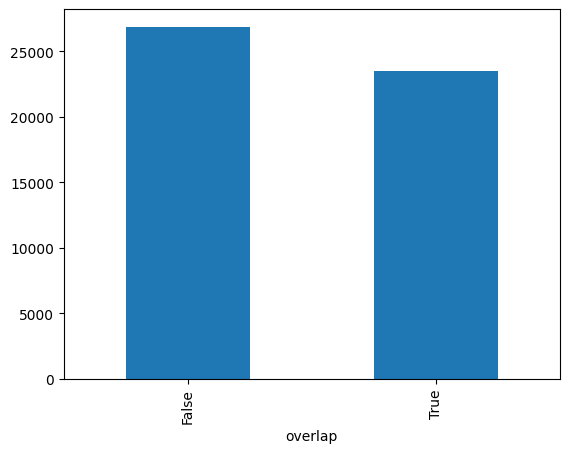

In [56]:
tokensDf.overlap.value_counts().plot(kind = 'bar')

### Overlapping annotations with tokens

### Feature type wise overlapping counts

In [63]:
overlappingAnnotationsDf.feature_type.value_counts()

feature_type
CDS      343
tRNA     218
rRNA      47
ncRNA     28
oriC       3
Name: count, dtype: int64

<Axes: xlabel='feature_type'>

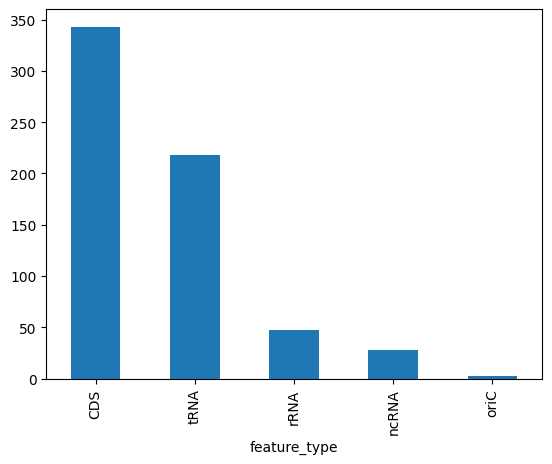

In [64]:
overlappingAnnotationsDf.feature_type.value_counts().plot(kind = 'bar')

### Top overlapping annotation names

In [69]:
overlappingAnnotationsDf.name.value_counts().reset_index()[:30]

,name,count
0,tRNA-Ala(tgc),24
1,tRNA-Lys(ttt),23
2,Phage protein,20
3,tRNA-Val(tac),18
4,tRNA-Gly(gcc),17
5,tRNA-Leu(taa),17
6,tRNA-Ile(gat),17
7,TIGR01741 family protein,14
8,16S ribosomal RNA,14
9,23S ribosomal RNA,13


### Top overlappig gene names

In [71]:
overlappingAnnotationsDf.gene.value_counts()[:20]

gene
trnL     38
trnG     30
trnA     24
trnK     23
trnV     18
tsr24    18
rrs      17
rrl      17
trnI     17
rrf      13
trnE     11
trnN     11
trnQ     10
trnY      9
trnT      9
trnR      9
mrp       8
trnP      8
tnp       8
ldcC      8
Name: count, dtype: int64

### Historam of tude code wise overlapping counts

<Axes: >

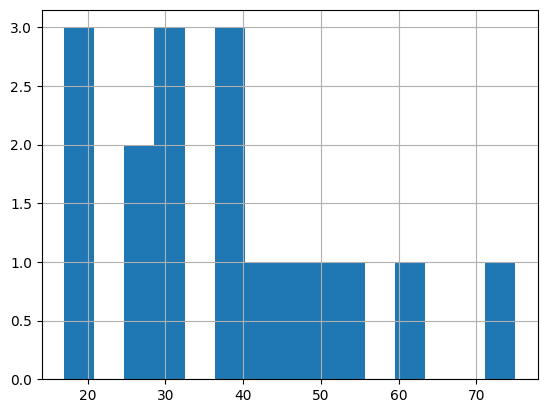

In [82]:
overlappingAnnotationsDf.tube_code.value_counts().reset_index()['count'].hist(bins=15)